<a href="https://colab.research.google.com/github/didlaak/python/blob/main/ex02_iris%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1.  문제 정의
# iris 데이터 분류
# 1. 머신러닝과 어떤점이 달랐는가
# 2. 딥러닝에서는 어떤곳에 집중하는가


In [ ]:
# 2. 데이터 수집
# 기존에 정리되어있던 자료 가져오기
from sklearn.datasets import load_iris
data = load_iris()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 3. 데이터 전처리
# 결측치, 이상치
X = data['data'] # 문제
y = data['target'] # 정답

In [ ]:
# 4. 탐색적 데이터 분석

In [ ]:
# 5. 모델 선택 및 하이퍼 파라미터 튜닝 > 머신러닝
# 5. 모델 설계 및 학습 방법 설정 > 딥러닝
# 데이터 나누기(train, test) - 데이터를 전처리 완료한후에 사용하자!!

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3)

In [ ]:
X_train.shape 

(105, 4)

In [ ]:
# 5-1 모델 설계
from tensorflow.keras import Sequential # 딥러닝 모델의 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 하나의 층의 디자인
# inputLayer : 데이터를 받아오는 역할, 데이터의 형태 지정
# Dense : 데이터를 분석

# DNN(Keep neural network)
# MLP(Multi Layer Perceptron) -> InputLayer와 Dense만 사용
model = Sequential()

# 입력층
model.add(InputLayer(input_shape = (4,)))
# 전체 몇개의 데이터가 들어오는지는 몰라도됨
# 한번에 몇개가 들어오는지는 알아야함 -> 붓꽃 데이터의 특성(꽃잎 길이, 꽃잎 넓이, 꽃받침 길이, 꽃받침 넓이)

# 중간층(2계층)
model.add(Dense(units = 32, activation = 'relu')) 
# units : 퍼센트론의 숫자(생각하는 방법의 수)
# activation : 다음층에 값을 전달하는 방법
model.add(Dense(units = 32, activation = 'relu')) 

# 출력층
# units : 퍼센트론의 숫자(생각하는 방법의 수) -> 출력해야하는 정답의 종류
# activation : 다음층에 값을 전달하는 방법 -> 마지막층은 값을 종합해서 결론
model.add(Dense(units = 3, activation = 'softmax')) 



In [ ]:
# 5-2 학습방법설정
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
# 6. 학습
# epovhs = 100 100번동안 발전하는 딥러닝 모델
history = model.fit(X_train, y_train, epochs = 100)
# 전에 학습했던 내용을 기억

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 2.2393 - accuracy: 0.3619
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8960 - accuracy: 0.3619
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.6793 - accuracy: 0.4000
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.5224 - accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.3715 - accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.2279 - accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0896 - accuracy: 0.3333
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9651 - accuracy: 0.3333
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8802 - accuracy: 0.3429
Epoch 10/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8161 - accuracy: 0.7810
Epoch 11/100
4/4 [===========

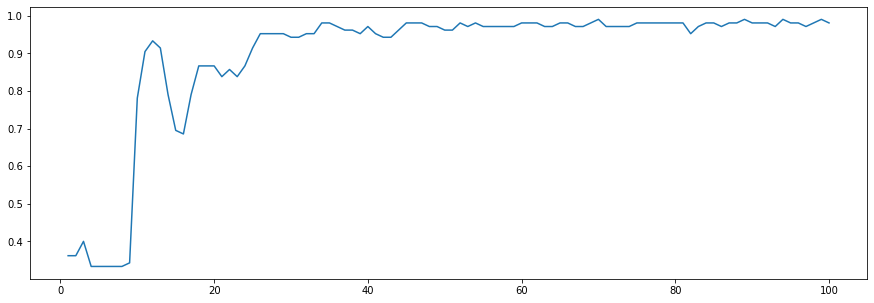

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(range(1,101),
        history.history['accuracy'],
        label='accuracy')
plt.show()

In [ ]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 82ms/step


array([[9.9223512e-01, 7.5043477e-03, 2.6050775e-04]], dtype=float32)

In [ ]:
y_train

array([1, 0, 1, 0, 0, 0, 2, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 2,
       0, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2,
       0, 2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 1, 0, 2, 0])


딥러닝 코드에서 우리가 추가적으로 알아야할 개념
1. activation의 개념
- 다음층의 퍼셉트론에게 값을 전달하기전에 거치는 단계
- 층마다 같은 활성화함수를 공유
- 출력층에 사용하는 활성화함수
  - sigmoid : 이진분류 > 1개 대답 : units =1
  - softmax : 다중분류 > 정답의 갯수만큼 대답
  - linear : 회귀 > 연속적인 숫자, 1개 대답
2. 퍼셉트론의 동작원리
- 인간의 뉴런을 모방함
- 퍼셉트론 = 선형함수 + 역치(activation)
- 다층 퍼셉트론(AND게이트 OR게이트 XOR게이트)
3. 출력층이 다른층과의 다른점
- 출력층은 결론을 내는 층이다
- activation이 분석하는 종류에 따라 다르다
- units : 
  - 이진분류 > 1개 대답 : units =1
  - 다중분류 > 정답의 갯수만큼 대답 units = 정답종류
  - 회귀 > 연속적인 숫자 : units = 1
  - 출력층을 제외한 층(입력, 중간)에서 사용되는 활성화함수
    - relu(보통 동작 잘함)
    - leaky relu, elu

4. compile(학습 방법 설정)
  
  1) loss(오차)
      
      - bivary_crossentropy : 이진분류
      - categorical_crossentropy : 다중분류
          추가)spares_categorical_crossentropy
      - mean_squared_error : 회귀
  
  2) optimizer(최적화 함수 - 경사하강법)
      - Adam (보통 좋은 값을 출력함)
      - Nadam, RmsProp 
      - GD / SGD(보통 거의 사용하지 않음)
      
  3) metrics(평가 방법)
      - accuracy : 분류
      - mean_squared_error : 회귀, 생략 가능

5. 이진분류 / 회귀/ 다중분류마다 달라지는점
      - 모델 설계전
          - 다중분류만 y데이터에  원핫인코딩 하기
      - 모델 설계
          - 출력층의 units 
          
          : 이진분류, 회귀 = 1
          
          : 다중분류 = 클래스의 수(ex혈액형 = 4)
          - 출력층의 activation

         : 이진분류 = sigmoid

         : 다중분류 = softmax

         : 회귀 = linaer

         : ghlrnl
      - 모델 학습 방법 설정
        - loss
          
          : 이진분류 = binary_crossentropy

          : 다중분류 
            - 원핫인코딩O : categorical_crossentropy
            - 원핫인코딩X : spares_categorical_crossentropy
          
          : 회귀 = mean_squared_error
        - metrics

          : 분류 = accuracy

          : 회귀 = mean_squared_error OR 생략
              

-이진분류 - sigmoid : 입력값을 0 ~ 1까지로 변환

-다중분류 - softmax : 클래스마다의 예측값을 출력

-회귀 - linear : 연속적인 숫자를 출력

-출력층을 제외한 층에서 사용되는 활성화함수

잘 모르겠다 = relu